# Data Processing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_columns', None)

import datetime
from pandas_datareader import data as pdr
import yfinance as yf

import re
import sklearn
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from pprint import pprint

In [2]:
ind_prod_goods = pd.read_csv('daily_industrial_production.csv')
bill_rates = pd.read_csv('daily_3_month_tbill_rate.csv')
equity_mkt_vol = pd.read_csv('EMV_IDT Index.csv')
unemployment = pd.read_csv('daily_unemployment_rate.csv')
equity_mkt_uncertainty = pd.read_csv('EMU Index.csv')
equity_policy_uncertainty = pd.read_csv('EPU Index.csv')

equity_trading_funds = pd.read_csv('ETFs_daily.csv')

In [3]:
equity_trading_funds.head()

,Date,DBA,GLD,USO
0,2008-01-02,30.408634,84.860001,627.760010
1,2008-01-03,31.127235,85.570000,626.960022
2,2008-01-04,31.454702,85.129997,618.479980
3,2008-01-07,31.036274,84.769997,604.000000
4,2008-01-08,31.381929,86.779999,608.479980


In [4]:
ind_prod_goods.rename(columns={'DATE': 'date', 'IPCONGD': 'ind_prod_goods'}, inplace=True)
ind_prod_goods['date'] = pd.to_datetime(ind_prod_goods['date'])
ind_prod_goods.sort_values('date', inplace=True)

bill_rates.rename(columns={'DATE': 'date', 'DTB3': 'bill_rates'}, inplace=True)
bill_rates['date'] = pd.to_datetime(bill_rates['date'])
bill_rates.sort_values('date', inplace=True)

equity_mkt_vol.rename(columns={'DATE': 'date', 'INFECTDISEMVTRACKD': 'equity_mkt_vol'}, inplace=True)
equity_mkt_vol['date'] = pd.to_datetime(equity_mkt_vol['date'])
equity_mkt_vol.sort_values('date', inplace=True)

unemployment.rename(columns={'DATE': 'date', 'UNRATE': 'unemployment'}, inplace=True)
unemployment['date'] = pd.to_datetime(unemployment['date'])
unemployment.sort_values('date', inplace=True)

equity_mkt_uncertainty.rename(columns={'DATE': 'date', 'WLEMUINDXD': 'equity_mkt_uncertainty'}, inplace=True)
equity_mkt_uncertainty['date'] = pd.to_datetime(equity_mkt_uncertainty['date'], format='%d/%m/%Y')
equity_mkt_uncertainty.sort_values('date', inplace=True)

equity_policy_uncertainty.rename(columns={'DATE': 'date', 'USEPUINDXD': 'equity_policy_uncertainty'}, inplace=True)
equity_policy_uncertainty['date'] = pd.to_datetime(equity_policy_uncertainty['date'])
equity_policy_uncertainty.sort_values('date', inplace=True)

equity_trading_funds.rename(columns={'Date': 'date', 'DBA': 'ETF_DBA', 'GLD': 'ETF_GLD', 'USO': 'ETF_USO'},
                            inplace=True)
equity_trading_funds['date'] = pd.to_datetime(equity_trading_funds['date'])
equity_trading_funds.sort_values('date', inplace=True)

In [5]:
print(ind_prod_goods.head())
print(bill_rates.head())
print(equity_mkt_vol.head())
print(unemployment.head())
print(equity_mkt_uncertainty.head())
print(equity_policy_uncertainty.head())
print(equity_trading_funds.head())

        date  ind_prod_goods
0 2008-01-01      108.870600
1 2008-01-02      108.865429
2 2008-01-03      108.860258
3 2008-01-04      108.855087
4 2008-01-05      108.849916
        date  bill_rates
0 2008-01-01         NaN
1 2008-01-02        3.18
2 2008-01-03        3.16
3 2008-01-04        3.12
4 2008-01-07        3.19
        date equity_mkt_vol
0 2008-01-01        0.68000
1 2008-01-02        0.47000
2 2008-01-03        0.36000
3 2008-01-04        0.00000
4 2008-01-05        0.00000
        date  unemployment
0 2008-01-01      5.000000
1 2008-01-02      4.996774
2 2008-01-03      4.993548
3 2008-01-04      4.990323
4 2008-01-05      4.987097
        date  equity_mkt_uncertainty
0 2008-01-01                  149.95
1 2008-01-02                   97.01
2 2008-01-03                   12.12
3 2008-01-04                   45.17
4 2008-01-05                  143.82
        date  equity_policy_uncertainty
0 2008-01-01                     232.87
1 2008-01-02                      83.14
2 20

In [6]:
merged_df = ind_prod_goods.merge(bill_rates, on='date', how='inner')
merged_df = merged_df.merge(equity_mkt_vol, on='date', how='inner')
merged_df = merged_df.merge(unemployment, on='date', how='inner')
merged_df = merged_df.merge(equity_mkt_uncertainty, on='date', how='inner')
merged_df = merged_df.merge(equity_policy_uncertainty, on='date', how='inner')

data_etf = merged_df.merge(equity_trading_funds, on='date', how='inner')
data_etf.dropna(axis=0, how='any', inplace=True) 
data_etf.to_csv('Merged_Dataset_DBA.csv', index=False)
data_etf.isnull().sum()
data_etf.info()

date                         0
ind_prod_goods               0
bill_rates                   0
equity_mkt_vol               0
unemployment                 0
equity_mkt_uncertainty       0
equity_policy_uncertainty    0
ETF_DBA                      0
ETF_GLD                      0
ETF_USO                      0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4039 entries, 0 to 4068
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date                       4039 non-null   datetime64[ns]
 1   ind_prod_goods             4039 non-null   float64       
 2   bill_rates                 4039 non-null   float64       
 3   equity_mkt_vol             4039 non-null   object        
 4   unemployment               4039 non-null   float64       
 5   equity_mkt_uncertainty     4039 non-null   float64       
 6   equity_policy_uncertainty  4039 non-null   float64       
 7   ETF_DBA                    4039 non-null   float64       
 8   ETF_GLD                    4039 non-null   float64       
 9   ETF_USO                    4039 non-null   float64       
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 347.1+ KB


# Feature Engineering

In [7]:
# Define your feature calculation functions
def calculate_sma(data, window, column_name, ticker):
    """Calculate Simple Moving Average."""
    data[f"{ticker}_SMA_{window}"] = data[column_name].rolling(window).mean()
    return data

def calculate_ema(data, window, column_name, ticker):
    """Calculate Exponential Moving Average."""
    data[f"{ticker}_EMA_{window}"] = data[column_name].ewm(span=window, ignore_na=True).mean()
    return data

def calculate_macd(data, column_name, ticker, short_window=12, long_window=26, signal_window=9):
    """Calculate Moving Average Convergence Divergence."""
    short_ema = data[column_name].ewm(span=short_window, adjust=False).mean()
    long_ema = data[column_name].ewm(span=long_window, adjust=False).mean()
    macd_line = short_ema - long_ema
    signal_line = macd_line.ewm(span=signal_window, adjust=False).mean()
    data[f"{ticker}_MACD"] = macd_line
    data[f"{ticker}_MACD_SIGNAL"] = signal_line
    return data

# def calculate_mfi(data, column_name, period=14):
#     """Calculate Money Flow Index."""
#     tp = (data['High'] + data['Low'] + data[column_name]) / 3
#     rmf = tp * data['Volume']
#     pos_flow = ((tp.diff() > 0) * rmf).rolling(window=period).sum()
#     neg_flow = ((tp.diff() < 0) * rmf).rolling(window=period).sum()
#     mfi = 100 - (100 / (1 + (pos_flow / neg_flow)))
#     data["MFI"] = mfi
#     return data

# def calculate_obv(data, column_name):
#     """Calculate On-Balance Volume."""
#     obv = [0]
#     for i in range(1, len(data)):
#         if data[column_name][i] > data[column_name][i-1]:
#             obv.append(obv[-1] + data['Volume'][i])
#         elif data[column_name][i] < data[column_name][i-1]:
#             obv.append(obv[-1] - data['Volume'][i])
#         else:
#             obv.append(obv[-1])
#     data["OBV"] = obv
#     return data

def calculate_rsi(data, column_name, period, ticker, use_ema=True):
    """Calculate Relative Strength Index."""
    delta = data[column_name].diff()
    up, down = delta.clip(lower=0), -delta.clip(upper=0)
    if use_ema:
        ma_up = up.ewm(com=period-1, adjust=True).mean()
        ma_down = down.ewm(com=period-1, adjust=True).mean()
    else:
        ma_up = up.rolling(window=period).mean()
        ma_down = down.rolling(window=period).mean()
    rsi = 100 - (100 / (1 + ma_up / ma_down))
    data[f"{ticker}_RSI_{period}"] = rsi
    return data

def calculate_stochastic(data, column_name, window, ticker):
    """Calculate Stochastic Oscillator."""
    low_min = data[column_name].rolling(window=window).min()
    high_max = data[column_name].rolling(window=window).max()
    data[f"{ticker}_STOCH_{window}_k"] = 100 * (data[column_name] - low_min) / (high_max - low_min)
    data[f"{ticker}_STOCH_{window}_d"] = data[f"{ticker}_STOCH_{window}_k"].rolling(window=3).mean()
    return data

# def calculate_wad(data, column_name):
#     """Calculate Williams Accumulation Distribution."""
#     mfm = ((data[column_name] - data['Low']) - (data['High'] - data[column_name])) / (data['High'] - data['Low'])
#     data['WAD'] = (mfm * data['Volume']).cumsum()
#     return data

def calculate_rate_of_change(data, window, column_name, ticker):
    """Calculate Rate of Change."""
    data[f"{ticker}_ROC_{window}"] = data[column_name].pct_change(periods=window) * 100
    return data

def calculate_lagged_features(data, column_name, lags, ticker):
    """Calculate Lagged Features."""
    for lag in range(1, lags + 1):
        data[f"{ticker}_LAG_{lag}"] = data[column_name].shift(lag)
    return data

def create_signals(df, column_name, ticker):
    """Create signals based on price movement: 1 for up, 0 for down."""
    df['Previous'] = df[column_name].shift(1)
    df[f"{ticker}_Signal"] = (df[column_name] > df['Previous']).astype(int)
    df.drop(['Previous'], axis=1, inplace=True)
    return df

def get_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    return data

In [8]:
start_date = datetime.date(2008, 1, 1)
end_date = datetime.date(2024, 3, 31)
datasets = data_etf
ticker_columns = ['ETF_DBA', 'ETF_GLD', 'ETF_USO']
tickers = ['DBA', 'GLD', 'USO']

df_combined = pd.DataFrame()

for ticker_column, ticker in zip(ticker_columns, tickers):
    df = data_etf.copy()

    sma_list = [50, 200]
    ema_list = [10, 30, 200]
    rsi_list = [10, 30, 200]
    stochastic_list = [10, 30, 200]
    rate_of_change_list = [10, 30]

    for val in sma_list:
        df = calculate_sma(df, val, ticker_column, ticker)

    for val in ema_list:
        df = calculate_ema(df, val, ticker_column, ticker)

    df = calculate_macd(df, ticker_column, ticker)

    for val in rsi_list:
        df = calculate_rsi(df, ticker_column, val, ticker)

    for val in stochastic_list:
        df = calculate_stochastic(df, ticker_column, val, ticker)

    for val in rate_of_change_list:
        df = calculate_rate_of_change(df, val, ticker_column, ticker)

    df.set_index('date', inplace=True)  

    df[f"{ticker}_returns"] = np.log(df[ticker_column] / df[ticker_column].shift(1))

    lags = 5
    df = calculate_lagged_features(df, f"{ticker}_returns", lags, ticker)

    # 检查是否有重复列，如果有则跳过这些列
    common_cols = df_combined.columns.intersection(df.columns)
    if not common_cols.empty:
        df = df.drop(columns=common_cols)

    if df_combined.empty:
        df_combined = df
    else:
        df_combined = df_combined.join(df, how='outer')

additional_tickers = ["^VIX", "^OVX", "^VXN", "EPU", "ADX.AX"]
for additional_ticker in additional_tickers:
    additional_df = get_data(additional_ticker, start_date, end_date)
    
    df_combined = df_combined.merge(additional_df['Adj Close'].rename(f"{additional_ticker}"), left_index=True, right_index=True, how='left')

df_combined.reset_index(inplace=True)
df_combined.to_csv('data_with_indicators.csv', index=False)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [9]:
data_with_indicators = pd.read_csv('data_with_indicators.csv')
data_with_indicators.dropna(axis=0, how='any', inplace=True)
data_with_indicators.set_index('date', inplace=True)

tickers_PnL = ['DBA', 'GLD', 'USO']

for ticker in tickers_PnL:
    data_with_indicators[f"{ticker}_PnL"] = np.sign(
        data_with_indicators[f"{ticker}_returns"])
    
    data_with_indicators[f"{ticker}_PnL"] = data_with_indicators[
        f"{ticker}_PnL"].apply(lambda x: 0 if x <= 0 else x)

data_with_indicators.head()
data_with_indicators.info()

,ind_prod_goods,bill_rates,equity_mkt_vol,unemployment,equity_mkt_uncertainty,equity_policy_uncertainty,ETF_DBA,ETF_GLD,ETF_USO,DBA_SMA_50,DBA_SMA_200,DBA_EMA_10,DBA_EMA_30,DBA_EMA_200,DBA_MACD,DBA_MACD_SIGNAL,DBA_RSI_10,DBA_RSI_30,DBA_RSI_200,DBA_STOCH_10_k,DBA_STOCH_10_d,DBA_STOCH_30_k,DBA_STOCH_30_d,DBA_STOCH_200_k,DBA_STOCH_200_d,DBA_ROC_10,DBA_ROC_30,DBA_returns,DBA_LAG_1,DBA_LAG_2,DBA_LAG_3,DBA_LAG_4,DBA_LAG_5,GLD_SMA_50,GLD_SMA_200,GLD_EMA_10,GLD_EMA_30,GLD_EMA_200,GLD_MACD,GLD_MACD_SIGNAL,GLD_RSI_10,GLD_RSI_30,GLD_RSI_200,GLD_STOCH_10_k,GLD_STOCH_10_d,GLD_STOCH_30_k,GLD_STOCH_30_d,GLD_STOCH_200_k,GLD_STOCH_200_d,GLD_ROC_10,GLD_ROC_30,GLD_returns,GLD_LAG_1,GLD_LAG_2,GLD_LAG_3,GLD_LAG_4,GLD_LAG_5,USO_SMA_50,USO_SMA_200,USO_EMA_10,USO_EMA_30,USO_EMA_200,USO_MACD,USO_MACD_SIGNAL,USO_RSI_10,USO_RSI_30,USO_RSI_200,USO_STOCH_10_k,USO_STOCH_10_d,USO_STOCH_30_k,USO_STOCH_30_d,USO_STOCH_200_k,USO_STOCH_200_d,USO_ROC_10,USO_ROC_30,USO_returns,USO_LAG_1,USO_LAG_2,USO_LAG_3,USO_LAG_4,USO_LAG_5,^VIX,^OVX,^VXN,EPU,ADX.AX,DBA_PnL,GLD_PnL,USO_PnL
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2009-06-22,95.793720,0.20,1.30000,9.5,122.02,109.85,23.786880,90.540001,290.000000,24.396108,23.865612,24.632198,24.825004,24.930795,-0.139841,0.147701,29.946961,46.834537,47.758233,0.000000,0.000000,0.000000,1.715727,34.576638,35.421603,-6.860257,-4.003005,-0.013163,-0.011092,-0.006067,0.004547,-0.002276,-0.034634,90.8990,85.63155,92.158515,92.270432,88.327057,-0.069443,0.450645,37.023298,48.481131,50.866794,0.000000,15.821306,12.743609,25.745134,73.884887,76.798556,-3.227872,0.622358,-0.014909,0.003161,-0.008045,0.004558,0.009070,-0.011677,265.784001,331.0132,303.227522,288.349732,341.113829,10.871288,13.744042,42.372230,54.893655,45.548772,0.000000,27.896623,59.069214,76.252981,20.417809,22.012480,-3.436337,11.572786,-0.046357,-0.022912,0.003868,0.004922,-0.000260,-0.023349,31.170000,46.950001,31.410000,16.775000,1.381815,0.0,0.0,0.0
2009-06-23,95.835607,0.20,0.00000,9.5,16.51,84.88,24.157682,90.919998,299.279999,24.422249,23.831492,24.545922,24.781951,24.922907,-0.175267,0.083107,38.279684,48.883739,48.026771,19.900542,6.633514,12.461077,4.153692,38.296831,36.191297,-6.494450,-2.323838,0.015468,-0.013163,-0.011092,-0.006067,0.004547,-0.002276,90.9598,85.69170,91.933330,92.183308,88.353512,-0.175360,0.325444,40.048817,49.211834,50.960470,11.445701,13.477099,9.333293,18.403443,75.251784,75.971215,-3.101357,1.371386,0.004188,-0.014909,0.003161,-0.008045,0.004558,0.009070,267.020801,328.9720,302.509791,289.054910,340.687021,9.816308,12.958495,51.641170,57.273114,45.828519,33.819235,17.970904,72.911693,70.525064,22.467571,21.888473,-2.042416,15.856299,0.031499,-0.046357,-0.022912,0.003868,0.004922,-0.000260,30.580000,45.549999,30.690001,16.809311,1.283114,1.0,1.0,1.0
2009-06-24,95.877493,0.19,0.00000,9.5,13.21,93.11,24.037172,91.449997,296.720001,24.444312,23.797269,24.453422,24.733901,24.913873,-0.210638,0.024358,36.703154,48.258376,47.946270,13.432894,11.111145,8.411244,6.957440,39.324585,37.399351,-5.914365,-3.390456,-0.005001,0.015468,-0.013163,-0.011092,-0.006067,0.004547,91.0414,85.75700,91.845451,92.135997,88.385096,-0.214066,0.217542,44.202974,50.230323,51.091182,28.797379,13.414360,18.166606,13.414502,77.158254,75.431642,-2.567658,0.826902,0.005812,0.004188,-0.014909,0.003161,-0.008045,0.004558,268.281601,326.9748,301.457102,289.549432,340.238561,8.673672,12.101531,49.214874,56.423704,45.763334,24.489798,19.436344,69.093081,67.024662,21.973439,21.619606,-4.824226,13.668400,-0.008591,0.031499,-0.046357,-0.022912,0.003868,0.004922,29.049999,44.459999,29.030001,17.173098,1.233763,0.0,1.0,0.0
2009-06-25,95.919380,0.18,0.70000,9.5,17.95,70.63,24.176224,92.309998,304.399994,24.472678,23.768063,24.403023,24.697921,24.906351,-0.224857,-0.025485,39.877682,49.036595,48.047255,25.301287,19.544908,13.084172,11.318831,40.673812,39.431743,-5.746290,-1.584892,0.005768,-0.005001,0.015468,-0.013163,-0.011092,-

<class 'pandas.core.frame.DataFrame'>
Index: 3594 entries, 2009-06-22 to 2024-03-01
Data columns (total 89 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ind_prod_goods             3594 non-null   float64
 1   bill_rates                 3594 non-null   float64
 2   equity_mkt_vol             3594 non-null   object 
 3   unemployment               3594 non-null   float64
 4   equity_mkt_uncertainty     3594 non-null   float64
 5   equity_policy_uncertainty  3594 non-null   float64
 6   ETF_DBA                    3594 non-null   float64
 7   ETF_GLD                    3594 non-null   float64
 8   ETF_USO                    3594 non-null   float64
 9   DBA_SMA_50                 3594 non-null   float64
 10  DBA_SMA_200                3594 non-null   float64
 11  DBA_EMA_10                 3594 non-null   float64
 12  DBA_EMA_30                 3594 non-null   float64
 13  DBA_EMA_200                3594 non-nu

In [10]:
data_with_indicators.columns

Index(['ind_prod_goods', 'bill_rates', 'equity_mkt_vol', 'unemployment',
       'equity_mkt_uncertainty', 'equity_policy_uncertainty', 'ETF_DBA',
       'ETF_GLD', 'ETF_USO', 'DBA_SMA_50', 'DBA_SMA_200', 'DBA_EMA_10',
       'DBA_EMA_30', 'DBA_EMA_200', 'DBA_MACD', 'DBA_MACD_SIGNAL',
       'DBA_RSI_10', 'DBA_RSI_30', 'DBA_RSI_200', 'DBA_STOCH_10_k',
       'DBA_STOCH_10_d', 'DBA_STOCH_30_k', 'DBA_STOCH_30_d', 'DBA_STOCH_200_k',
       'DBA_STOCH_200_d', 'DBA_ROC_10', 'DBA_ROC_30', 'DBA_returns',
       'DBA_LAG_1', 'DBA_LAG_2', 'DBA_LAG_3', 'DBA_LAG_4', 'DBA_LAG_5',
       'GLD_SMA_50', 'GLD_SMA_200', 'GLD_EMA_10', 'GLD_EMA_30', 'GLD_EMA_200',
       'GLD_MACD', 'GLD_MACD_SIGNAL', 'GLD_RSI_10', 'GLD_RSI_30',
       'GLD_RSI_200', 'GLD_STOCH_10_k', 'GLD_STOCH_10_d', 'GLD_STOCH_30_k',
       'GLD_STOCH_30_d', 'GLD_STOCH_200_k', 'GLD_STOCH_200_d', 'GLD_ROC_10',
       'GLD_ROC_30', 'GLD_returns', 'GLD_LAG_1', 'GLD_LAG_2', 'GLD_LAG_3',
       'GLD_LAG_4', 'GLD_LAG_5', 'USO_SMA_50', 'USO_S

In [11]:
features_to_scale = [
    'ind_prod_goods', 'bill_rates', 'equity_mkt_vol', 'unemployment',
    'equity_mkt_uncertainty', 'equity_policy_uncertainty', 'ETF_DBA',
    'ETF_GLD', 'ETF_USO', 'DBA_SMA_50', 'DBA_SMA_200', 'DBA_EMA_10',
    'DBA_EMA_30', 'DBA_EMA_200', 'DBA_MACD', 'DBA_MACD_SIGNAL', 'DBA_RSI_10',
    'DBA_RSI_30', 'DBA_RSI_200', 'DBA_STOCH_10_k', 'DBA_STOCH_10_d',
    'DBA_STOCH_30_k', 'DBA_STOCH_30_d', 'DBA_STOCH_200_k', 'DBA_STOCH_200_d',
    'DBA_ROC_10', 'DBA_ROC_30', 'DBA_returns', 'DBA_LAG_1', 'DBA_LAG_2',
    'DBA_LAG_3', 'DBA_LAG_4', 'DBA_LAG_5', 'GLD_SMA_50', 'GLD_SMA_200',
    'GLD_EMA_10', 'GLD_EMA_30', 'GLD_EMA_200', 'GLD_MACD', 'GLD_MACD_SIGNAL',
    'GLD_RSI_10', 'GLD_RSI_30', 'GLD_RSI_200', 'GLD_STOCH_10_k',
    'GLD_STOCH_10_d', 'GLD_STOCH_30_k', 'GLD_STOCH_30_d', 'GLD_STOCH_200_k',
    'GLD_STOCH_200_d', 'GLD_ROC_10', 'GLD_ROC_30', 'GLD_returns', 'GLD_LAG_1',
    'GLD_LAG_2', 'GLD_LAG_3', 'GLD_LAG_4', 'GLD_LAG_5', 'USO_SMA_50',
    'USO_SMA_200', 'USO_EMA_10', 'USO_EMA_30', 'USO_EMA_200', 'USO_MACD',
    'USO_MACD_SIGNAL', 'USO_RSI_10', 'USO_RSI_30', 'USO_RSI_200',
    'USO_STOCH_10_k', 'USO_STOCH_10_d', 'USO_STOCH_30_k', 'USO_STOCH_30_d',
    'USO_STOCH_200_k', 'USO_STOCH_200_d', 'USO_ROC_10', 'USO_ROC_30',
    'USO_returns', 'USO_LAG_1', 'USO_LAG_2', 'USO_LAG_3', 'USO_LAG_4',
    'USO_LAG_5', '^VIX', '^OVX', '^VXN', 'EPU', 'ADX.AX'
]

for column in features_to_scale:
    data_with_indicators.loc[:, column] = pd.to_numeric(
        data_with_indicators.loc[:, column], errors='coerce')

data_with_indicators.loc[:, features_to_scale] = data_with_indicators[
    features_to_scale].fillna(
        data_with_indicators[features_to_scale].mean())

scaler = StandardScaler()
data_with_indicators.loc[:, features_to_scale] = scaler.fit_transform(
    data_with_indicators[features_to_scale])

In [12]:
def heatmap_for_indicators(df, df_name):
    internal_chars = [
        'ind_prod_goods', 'bill_rates', 'equity_mkt_vol', 'unemployment',
        'equity_mkt_uncertainty', 'equity_policy_uncertainty', 'ETF_DBA',
        'ETF_GLD', 'ETF_USO', 'DBA_SMA_50', 'DBA_SMA_200', 'DBA_EMA_10',
        'DBA_EMA_30', 'DBA_EMA_200', 'DBA_MACD', 'DBA_MACD_SIGNAL',
        'DBA_RSI_10', 'DBA_RSI_30', 'DBA_RSI_200', 'DBA_STOCH_10_k',
        'DBA_STOCH_10_d', 'DBA_STOCH_30_k', 'DBA_STOCH_30_d',
        'DBA_STOCH_200_k', 'DBA_STOCH_200_d', 'DBA_ROC_10', 'DBA_ROC_30',
        'DBA_returns', 'DBA_LAG_1', 'DBA_LAG_2', 'DBA_LAG_3', 'DBA_LAG_4',
        'DBA_LAG_5', 'GLD_SMA_50', 'GLD_SMA_200', 'GLD_EMA_10', 'GLD_EMA_30',
        'GLD_EMA_200', 'GLD_MACD', 'GLD_MACD_SIGNAL', 'GLD_RSI_10',
        'GLD_RSI_30', 'GLD_RSI_200', 'GLD_STOCH_10_k', 'GLD_STOCH_10_d',
        'GLD_STOCH_30_k', 'GLD_STOCH_30_d', 'GLD_STOCH_200_k',
        'GLD_STOCH_200_d', 'GLD_ROC_10', 'GLD_ROC_30', 'GLD_returns',
        'GLD_LAG_1', 'GLD_LAG_2', 'GLD_LAG_3', 'GLD_LAG_4', 'GLD_LAG_5',
        'USO_SMA_50', 'USO_SMA_200', 'USO_EMA_10', 'USO_EMA_30', 'USO_EMA_200',
        'USO_MACD', 'USO_MACD_SIGNAL', 'USO_RSI_10', 'USO_RSI_30',
        'USO_RSI_200', 'USO_STOCH_10_k', 'USO_STOCH_10_d', 'USO_STOCH_30_k',
        'USO_STOCH_30_d', 'USO_STOCH_200_k', 'USO_STOCH_200_d', 'USO_ROC_10',
        'USO_ROC_30', 'USO_returns', 'USO_LAG_1', 'USO_LAG_2', 'USO_LAG_3',
        'USO_LAG_4', 'USO_LAG_5', '^VIX', '^OVX', '^VXN', 'EPU', 'ADX.AX'
    ]

    corrmat = df[internal_chars].corr()

    plt.subplots(figsize=(30, 24))  
    sns.heatmap(corrmat,
                square=False,
                linewidths=.5,
                annot=True,
                annot_kws={"size": 6},  
                cmap='coolwarm')

    plt.title(f"Correlation Heatmap for {df_name}", fontsize=20)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    plt.show()

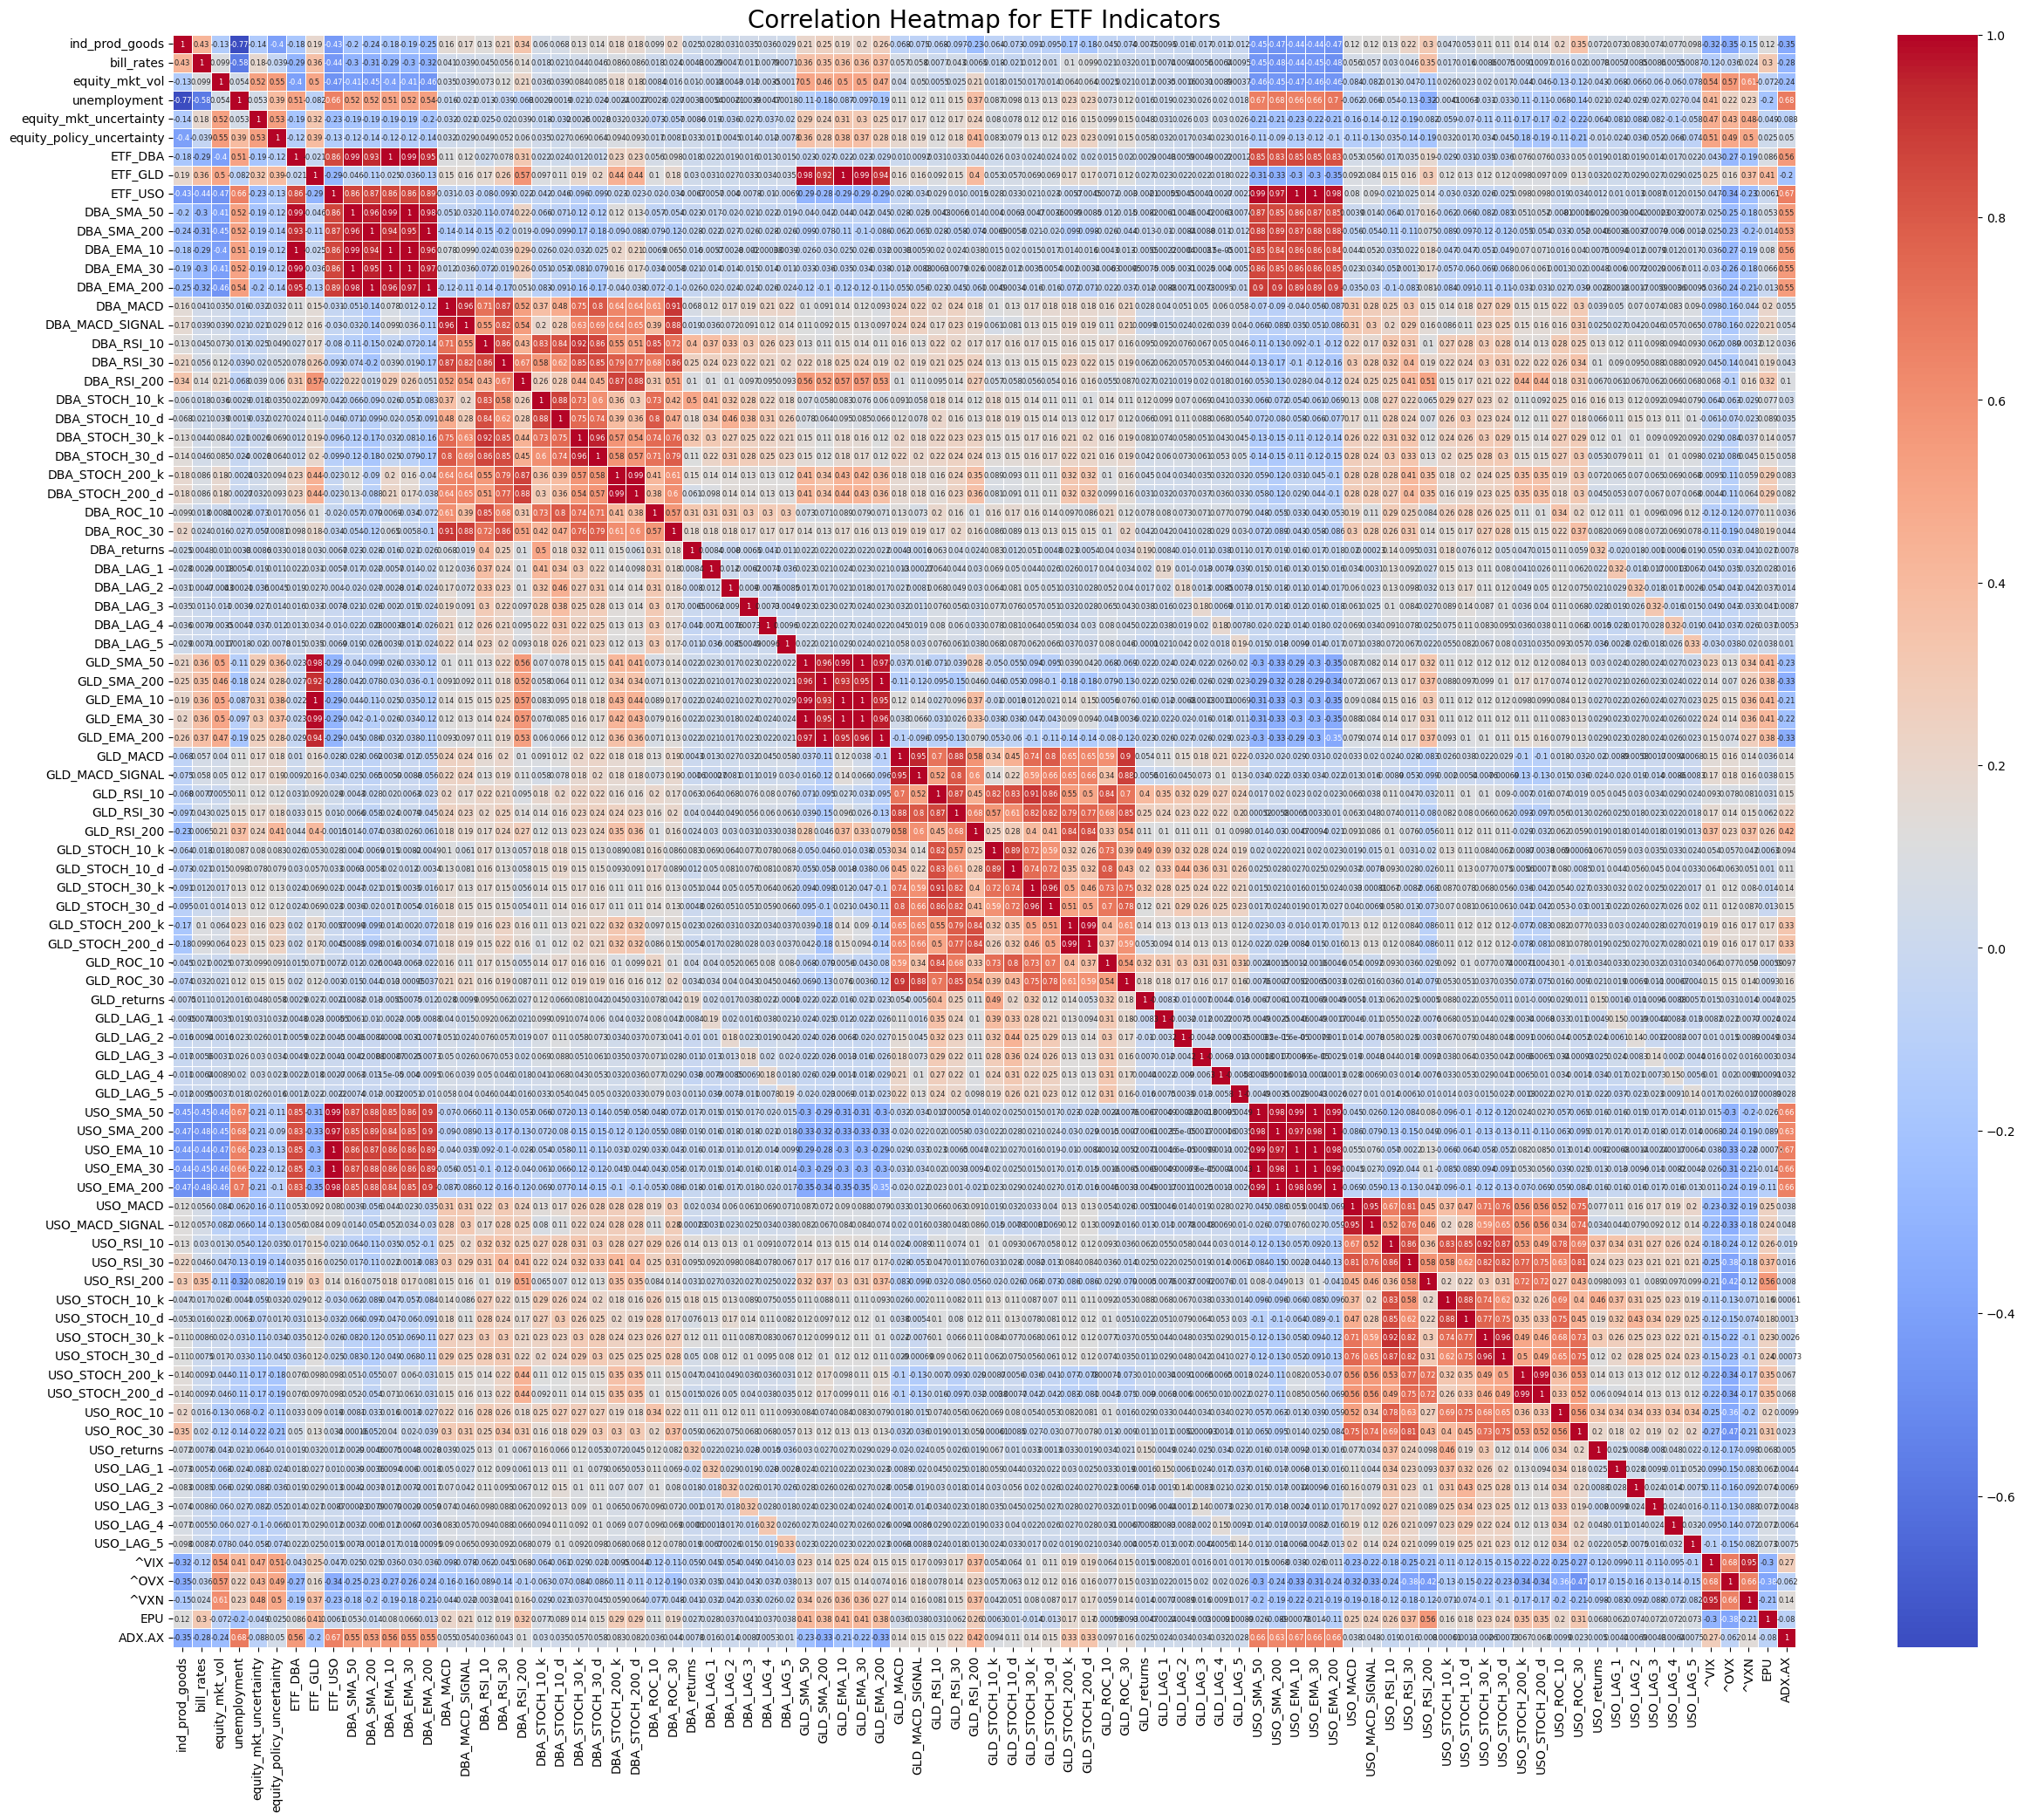

In [13]:
heatmap_for_indicators(data_with_indicators, 'ETF Indicators')

## PCA

In [14]:
# corr_matrix_dba = dba_with_indicators.drop(['PnL'], axis = 1).corr().abs()
# corr_matrix_gld = gld_with_indicators.drop(['PnL'], axis = 1).corr().abs()
# corr_matrix_uso = uso_with_indicators.drop(['PnL'], axis = 1).corr().abs()

In [15]:
# # Extract highly collinear feature pairs

# def get_high_corr_features(corr_matrix, threshold=0.8):
#     high_corr_pairs = []
#     for i in range(len(corr_matrix.columns)):
#         for j in range(i):
#             if corr_matrix.iloc[i, j] > threshold:
#                 high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j]))
#     return high_corr_pairs

# high_corr_features_dba = get_high_corr_features(corr_matrix_dba)
# high_corr_features_gld = get_high_corr_features(corr_matrix_gld)
# high_corr_features_uso = get_high_corr_features(corr_matrix_uso)

# print('High correlation features in DBA:')
# print(high_corr_features_dba)

# print('\nHigh correlation features in GLD:')
# print(high_corr_features_gld)

# print('\nHigh correlation features in USO:')
# print(high_corr_features_uso)

In [16]:
# # Get a list of unique highly autocorrelated features

# def get_unique_features(high_corr_features):
#     features = set()
#     for pair in high_corr_features:
#         features.update(pair)
#     return list(features)

# features_highcorr_dba = get_unique_features(high_corr_features_dba)
# features_highcorr_gld = get_unique_features(high_corr_features_gld)
# features_highcorr_uso = get_unique_features(high_corr_features_uso)

In [17]:
# print(features_highcorr_dba)

In [18]:
# # PCA
# def apply_pca(data, features, variance_ratio=0.8):
#     pca = PCA(n_components=variance_ratio)  
#     pca_data = pca.fit_transform(data[features])
#     # generate new pca columns
#     pca_columns = [f'PCA_{i+1}' for i in range(pca.n_components_)]
#     pca_df = pd.DataFrame(data=pca_data, columns=pca_columns)
#     return pca_df, pca

# pca_dba_df, pca_dba = apply_pca(dba_with_indicators, features_highcorr_dba, variance_ratio=0.8)
# pca_gld_df, pca_gld = apply_pca(gld_with_indicators, features_highcorr_gld, variance_ratio=0.8)
# pca_uso_df, pca_uso = apply_pca(uso_with_indicators, features_highcorr_uso, variance_ratio=0.8)

In [19]:
# def plot_pca_results(pca_df, labels=None, title='PCA Plot'):
#     plt.figure(figsize=(8, 6))
#     if labels is not None:
#         unique_labels = set(labels)
#         for label in unique_labels:
#             indices = [i for i, l in enumerate(labels) if l == label]
#             plt.scatter(pca_df.iloc[indices, 0], pca_df.iloc[indices, 1], label=label)
#         plt.legend()
#     else:
#         plt.scatter(pca_df.iloc[:, 0], pca_df.iloc[:, 1])
    
#     plt.xlabel('Principal Component 1')
#     plt.ylabel('Principal Component 2')
#     plt.title(title)
#     plt.grid(True)
#     plt.show()

    
# plot_pca_results(pca_dba_df, title='PCA of DBA Dataset')
# plot_pca_results(pca_gld_df, title='PCA of GLD Dataset')
# plot_pca_results(pca_uso_df, title='PCA of USO Dataset')

In [20]:
# # check the shape of our data

# print(dba_with_indicators.shape)
# print(pca_dba_df.shape)
# print(gld_with_indicators.shape)
# print(pca_gld_df.shape)
# print(uso_with_indicators.shape)
# print(pca_uso_df.shape)

In [21]:
# dba_with_indicators.reset_index(drop=True, inplace=True)
# pca_dba_df.reset_index(drop=True, inplace=True)
# gld_with_indicators.reset_index(drop=True, inplace=True)
# pca_gld_df.reset_index(drop=True, inplace=True)
# uso_with_indicators.reset_index(drop=True, inplace=True)
# pca_uso_df.reset_index(drop=True, inplace=True)

In [22]:
# dba_with_pca = dba_with_indicators.drop(columns=features_highcorr_dba).join(pca_dba_df)
# gld_with_pca = gld_with_indicators.drop(columns=features_highcorr_gld).join(pca_gld_df)
# uso_with_pca = uso_with_indicators.drop(columns=features_highcorr_uso).join(pca_uso_df)

# print("null of dba:", dba_with_pca.isnull().sum().sum())
# print("null of gld:", gld_with_pca.isnull().sum().sum())
# print("null of uso:", uso_with_pca.isnull().sum().sum())
# print("\n dba: \n \n", dba_with_pca.head(),"\n")
# print("gld: \n \n", gld_with_pca.head(),"\n")
# print("uso: \n \n", uso_with_pca.head(),"\n")

## Sample Balanced

In [23]:
data_with_indicators['DBA_PnL'].value_counts()
data_with_indicators['GLD_PnL'].value_counts()
data_with_indicators['USO_PnL'].value_counts()

0.0    1867
1.0    1727
Name: DBA_PnL, dtype: int64

1.0    1877
0.0    1717
Name: GLD_PnL, dtype: int64

1.0    1859
0.0    1735
Name: USO_PnL, dtype: int64

Target is balanced, no need to resample

# Machine Learning

## Base Model

In [24]:
import os
import locale
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.multioutput import MultiOutputClassifier
from skopt import BayesSearchCV
from skopt.space import Integer, Real, Categorical
from sklearn.metrics import accuracy_score, f1_score, cohen_kappa_score, precision_score, recall_score, confusion_matrix, make_scorer
from joblib import parallel_backend
from sklearn.model_selection import train_test_split

In [25]:
data_with_indicators.columns

Index(['ind_prod_goods', 'bill_rates', 'equity_mkt_vol', 'unemployment',
       'equity_mkt_uncertainty', 'equity_policy_uncertainty', 'ETF_DBA',
       'ETF_GLD', 'ETF_USO', 'DBA_SMA_50', 'DBA_SMA_200', 'DBA_EMA_10',
       'DBA_EMA_30', 'DBA_EMA_200', 'DBA_MACD', 'DBA_MACD_SIGNAL',
       'DBA_RSI_10', 'DBA_RSI_30', 'DBA_RSI_200', 'DBA_STOCH_10_k',
       'DBA_STOCH_10_d', 'DBA_STOCH_30_k', 'DBA_STOCH_30_d', 'DBA_STOCH_200_k',
       'DBA_STOCH_200_d', 'DBA_ROC_10', 'DBA_ROC_30', 'DBA_returns',
       'DBA_LAG_1', 'DBA_LAG_2', 'DBA_LAG_3', 'DBA_LAG_4', 'DBA_LAG_5',
       'GLD_SMA_50', 'GLD_SMA_200', 'GLD_EMA_10', 'GLD_EMA_30', 'GLD_EMA_200',
       'GLD_MACD', 'GLD_MACD_SIGNAL', 'GLD_RSI_10', 'GLD_RSI_30',
       'GLD_RSI_200', 'GLD_STOCH_10_k', 'GLD_STOCH_10_d', 'GLD_STOCH_30_k',
       'GLD_STOCH_30_d', 'GLD_STOCH_200_k', 'GLD_STOCH_200_d', 'GLD_ROC_10',
       'GLD_ROC_30', 'GLD_returns', 'GLD_LAG_1', 'GLD_LAG_2', 'GLD_LAG_3',
       'GLD_LAG_4', 'GLD_LAG_5', 'USO_SMA_50', 'USO_S

In [26]:
print("\n NULL value of data_with_indicators: \n \t"+f"{data_with_indicators.isnull().sum().sum()}")
print("\n --------------------------------------------\n")

X = data_with_indicators.drop([
    'ETF_DBA', 'ETF_GLD', 'ETF_USO', 'DBA_returns', 'GLD_returns',
    'USO_returns', 'DBA_PnL', 'GLD_PnL', 'USO_PnL'
], axis=1)

y = data_with_indicators[['DBA_PnL', 'GLD_PnL', 'USO_PnL']]

print("\n X: \n Shape:")
print(X.shape)
print(X.head())
print("\n --------------------------------------------\n ")
print("\n y: \n Shape:")
print(y.shape)
print(y.head())


 NULL value of data_with_indicators: 
 	0

 --------------------------------------------


 X: 
 Shape:
(3594, 80)
            ind_prod_goods  bill_rates  equity_mkt_vol  unemployment  \
date                                                                   
2009-06-22       -1.898805   -0.508114       -0.327303      1.512996   
2009-06-23       -1.879463   -0.508114       -0.496148      1.512996   
2009-06-24       -1.860121   -0.514812       -0.496148      1.512996   
2009-06-25       -1.840778   -0.521510       -0.405232      1.512996   
2009-06-26       -1.821436   -0.514812       -0.496148      1.512996   

            equity_mkt_uncertainty  equity_policy_uncertainty  DBA_SMA_50  \
date                                                                        
2009-06-22                0.688927                  -0.146810    0.802963   
2009-06-23               -0.544328                  -0.441826    0.808878   
2009-06-24               -0.582900                  -0.344590    0.8138

In [27]:
def split_data(X, y, test_size=0.2, val_size=0.4, random_state=42):
    # split to train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    # split train into train(for base model) and validation(for meta model)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=val_size, random_state=random_state)
    return X_train, X_val, X_test, y_train, y_val, y_test


In [28]:
# split dataset
X_train, X_val, X_test, y_train, y_val, y_test = split_data(X, y)


print("Data base set shape:", X_train.shape, y_train.shape)
print("Data validation set shape:", X_val.shape, y_val.shape)
print("Data test set shape:", X_test.shape, y_test.shape)

Data base set shape: (1725, 80) (1725, 3)
Data validation set shape: (1150, 80) (1150, 3)
Data test set shape: (719, 80) (719, 3)


In [29]:
# FULL Params

os.environ['LANG'] = 'en_US.UTF-8'
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

# set random seed
SEED = 42
np.random.seed(SEED)

# Define the model and hyperparameter search space
model_params = {
    'RandomForest': (RandomForestClassifier(), {
        'n_estimators': Integer(10, 200),
        'max_depth': Integer(1, 20),
        'min_samples_split': Integer(2, 10)
    }),
    'ExtraTrees': (ExtraTreesClassifier(), {
        'n_estimators': Integer(10, 200),
        'max_depth': Integer(1, 20),
        'min_samples_split': Integer(2, 10)
    }),
    'GradientBoosting': (GradientBoostingClassifier(), {
        'n_estimators': Integer(10, 200),
        'learning_rate': Real(0.01, 1.0, prior='log-uniform'),
        'max_depth': Integer(1, 20),
        'min_samples_split': Integer(2, 10)
    }),
    'SVM': (SVC(probability=True), {
        'C': Real(1e-3, 1e+3, prior='log-uniform'),  
        'gamma': Real(1e-4, 1e+1, prior='log-uniform'),  
        'kernel': Categorical(['linear', 'rbf'])
    }),
    'NaiveBayes': (GaussianNB(), {
        'var_smoothing': Real(1e-12, 1e-6, prior='log-uniform')
    })
}


'en_US.UTF-8'

In [30]:
# # Test Params


# os.environ['LANG'] = 'en_US.UTF-8'
# locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

# # Model parameters
# model_params = {
#     'RandomForest': (RandomForestClassifier(), {
#         'max_depth': Integer(1, 10)
#     }),
#     'NaiveBayes': (GaussianNB(), {
#         'var_smoothing': Real(1e-12, 1e-6, prior='log-uniform')
#     })
# }

In [31]:
data_with_indicators.head()

,ind_prod_goods,bill_rates,equity_mkt_vol,unemployment,equity_mkt_uncertainty,equity_policy_uncertainty,ETF_DBA,ETF_GLD,ETF_USO,DBA_SMA_50,DBA_SMA_200,DBA_EMA_10,DBA_EMA_30,DBA_EMA_200,DBA_MACD,DBA_MACD_SIGNAL,DBA_RSI_10,DBA_RSI_30,DBA_RSI_200,DBA_STOCH_10_k,DBA_STOCH_10_d,DBA_STOCH_30_k,DBA_STOCH_30_d,DBA_STOCH_200_k,DBA_STOCH_200_d,DBA_ROC_10,DBA_ROC_30,DBA_returns,DBA_LAG_1,DBA_LAG_2,DBA_LAG_3,DBA_LAG_4,DBA_LAG_5,GLD_SMA_50,GLD_SMA_200,GLD_EMA_10,GLD_EMA_30,GLD_EMA_200,GLD_MACD,GLD_MACD_SIGNAL,GLD_RSI_10,GLD_RSI_30,GLD_RSI_200,GLD_STOCH_10_k,GLD_STOCH_10_d,GLD_STOCH_30_k,GLD_STOCH_30_d,GLD_STOCH_200_k,GLD_STOCH_200_d,GLD_ROC_10,GLD_ROC_30,GLD_returns,GLD_LAG_1,GLD_LAG_2,GLD_LAG_3,GLD_LAG_4,GLD_LAG_5,USO_SMA_50,USO_SMA_200,USO_EMA_10,USO_EMA_30,USO_EMA_200,USO_MACD,USO_MACD_SIGNAL,USO_RSI_10,USO_RSI_30,USO_RSI_200,USO_STOCH_10_k,USO_STOCH_10_d,USO_STOCH_30_k,USO_STOCH_30_d,USO_STOCH_200_k,USO_STOCH_200_d,USO_ROC_10,USO_ROC_30,USO_returns,USO_LAG_1,USO_LAG_2,USO_LAG_3,USO_LAG_4,USO_LAG_5,^VIX,^OVX,^VXN,EPU,ADX.AX,DBA_PnL,GLD_PnL,USO_PnL
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2009-06-22,-1.898805,-0.508114,-0.327303,1.512996,0.688927,-0.146810,0.667393,-1.929735,1.266579,0.802963,0.687062,0.858361,0.902591,0.931823,-0.635892,0.778807,-1.381707,-0.316397,-0.451695,-1.297630,-1.439835,-1.391674,-1.388246,-0.248007,-0.222681,-2.609626,-0.872862,-1.533477,-1.296863,-0.702954,0.538072,-0.260564,-4.030414,-1.913039,-2.085488,-1.869576,-1.867193,-2.024826,-0.170220,0.194025,-0.984732,-0.339851,-0.123544,-1.380564,-1.067519,-1.137655,-0.788170,0.574114,0.674462,-1.136756,-0.018304,-1.529256,0.303840,-0.835205,0.439241,0.900894,-1.196337,1.021073,1.627668,1.391639,1.244673,1.679903,2.971612,3.926947,-0.556596,0.587432,-0.895578,-1.376183,-0.720177,0.154125,0.658539,-0.930962,-0.882907,-0.458352,0.952557,-1.984936,-0.974270,0.186724,0.230098,0.008175,-0.993120,1.757280,0.550211,1.383680,-2.436824,2.567219,0.0,0.0,0.0
2009-06-23,-1.879463,-0.508114,-0.496148,1.512996,-0.544328,-0.441826,0.750945,-1.914995,1.356004,0.808878,0.679168,0.838890,0.892844,0.929981,-0.805100,0.452592,-0.791282,-0.072012,-0.368541,-0.777860,-1.247242,-1.033729,-1.315752,-0.134899,-0.199160,-2.470357,-0.505092,1.806594,-1.538924,-1.290141,-0.703622,0.534655,-0.257807,-1.910653,-2.083079,-1.878344,-1.870608,-2.023742,-0.241977,0.103176,-0.777653,-0.250486,-0.093570,-1.081290,-1.135267,-1.236318,-1.008046,0.619424,0.646882,-1.095299,0.129917,0.404861,-1.527607,0.299182,-0.837770,0.443331,0.903371,1.033011,1.607774,1.384720,1.251482,1.675809,2.693723,3.708720,0.073478,0.863919,-0.808875,-0.496829,-1.006066,0.544023,0.491947,-0.863553,-0.887006,-0.265268,1.297573,1.377806,-1.988007,-0.970194,0.184532,0.232452,0.009100,1.673941,0.468883,1.283348,-2.429137,2.333688,1.0,1.0,1.0
2009-06-24,-1.860121,-0.514812,-0.496148,1.512996,-0.582900,-0.344590,0.723791,-1.894437,1.331335,0.813871,0.671252,0.818015,0.881966,0.927871,-0.974048,0.155893,-0.902988,-0.146592,-0.393468,-0.946784,-1.117241,-1.150061,-1.232381,-0.103652,-0.162244,-2.249509,-0.738702,-0.581290,1.807538,-1.532159,-1.291406,-0.702395,0.537753,-1.907451,-2.080464,-1.881766,-1.872462,-2.022448,-0.268199,0.024880,-0.493325,-0.125925,-0.051746,-0.627589,-1.137080,-0.980764,-1.157459,0.682619,0.628895,-0.920414,0.022172,0.569347,0.407993,-1.530065,0.297627,-0.834973,0.446786,1.045181,1.588308,1.374573,1.256257,1.671507,2.392745,3.470654,-0.091454,0.765219,-0.829078,-0.739409,-0.963857,0.436465,0.390141,-0.879803,-0.895894,-0.650601,1.121348,-0.353731,1.378333,-1.983052,-0.973976,0.186860,0.234002,1.457824,0.405563,1.052026,-2.347634,2.216922,0.0,1.0,0.0
2009-06-25,-1.840778,-0.521510,-0.405232,1.512996,-0.527496,-0.610188,0.755123,-1.861078,1.405342,0.820290,0.664495,0.806640,0.873820,0.926115,-1.041967,-0.095829,-0.678054,-0.053783,-0.362198,-0.636801,-0.872380,-1.015831,-1.102692,-0.062630,-0.100138,-2.185520,-0.343248,0.675010,-0.584915,1.813696,-1.533670,-1.

In [32]:
# Define functions: hyperparameter optimization and model evaluation
def optimize_model(model, param_dist, X_train, y_train, n_iter=30, cv=3, n_jobs=-1, random_state=42):
    """
    Optimize the hyperparameters of a given model.

    Parameters:
    model (estimator): The base model to be optimized.
    param_dist (dict): A dictionary containing the hyperparameter distributions.
    X_train (array-like): Training feature data.
    y_train (array-like): Training target data.
    n_iter (int): Number of iterations for hyperparameter search, default is 30.
    cv (int): Number of cross-validation folds, default is 3.
    n_jobs (int): Number of jobs to run in parallel, default is -1 (use all available cores).
    random_state (int): Random seed, default is 42.

    Returns:
    best_model (estimator): The model with the best hyperparameters.
    """
    chain = MultiOutputClassifier(estimator=model)
    opt = BayesSearchCV(
        chain,
        search_spaces={'estimator__' + k: v for k, v in param_dist.items()},
        n_iter=n_iter,
        cv=cv,
        n_jobs=n_jobs,
        random_state=random_state,
        scoring=make_scorer(accuracy_score)
    )
    
    with parallel_backend('threading'):
        opt.fit(X_train, y_train)
    
    best_model = opt.best_estimator_
    
    return best_model

def evaluate_model(model, X_val, y_val):
    """
    Evaluate the performance of a given model on multi-label data.

    Parameters:
    model (estimator): The model to be evaluated.
    X_val (array-like): Validation feature data.
    y_val (array-like): Validation target data.

    Returns:
    results (dict): A dictionary containing the model performance metrics for each label and average metrics.
    """
    y_pred = model.predict(X_val)
    
    # Calculate metrics for each label
    label_metrics = {}
    for i in range(y_val.shape[1]):
        label_metrics[y_val.columns[i]] = {
            'precision': precision_score(y_val.iloc[:, i], y_pred[:, i], zero_division=0),
            'recall': recall_score(y_val.iloc[:, i], y_pred[:, i], zero_division=0),
            'f1': f1_score(y_val.iloc[:, i], y_pred[:, i], zero_division=0),
            'kappa': cohen_kappa_score(y_val.iloc[:, i], y_pred[:, i]),  # Added Kappa score
            'confusion_matrix': confusion_matrix(y_val.iloc[:, i], y_pred[:, i])
        }

    # Average metrics across labels
    avg_precision = np.mean([metrics['precision'] for metrics in label_metrics.values()])
    avg_recall = np.mean([metrics['recall'] for metrics in label_metrics.values()])
    avg_f1 = np.mean([metrics['f1'] for metrics in label_metrics.values()])
    avg_kappa = np.mean([metrics['kappa'] for metrics in label_metrics.values()])  # Added average Kappa
    avg_accuracy = np.mean([accuracy_score(y_val.iloc[:, i], y_pred[:, i]) for i in range(y_val.shape[1])])
    
    return {
        'accuracy': avg_accuracy,
        'average_f1': avg_f1,
        'average_precision': avg_precision,
        'average_recall': avg_recall,
        'average_kappa': avg_kappa,  # Added average Kappa
        'label_metrics': label_metrics
    }

def visualize_results(results):
    """
    Visualize the performance metrics of models in a dataset.

    Parameters:
    results (dict): A dictionary containing evaluation results for each model on each dataset.
    """
    for dataset_name, dataset_results in results.items():
        accuracies = [metrics['accuracy'] for model, metrics in dataset_results.items()]
        f1_scores = [metrics['average_f1'] for model, metrics in dataset_results.items()]
        kappas = [metrics['average_kappa'] for model, metrics in dataset_results.items()]

        bar_width = 0.25
        r1 = np.arange(len(dataset_results))
        r2 = [x + bar_width for x in r1]
        r3 = [x + bar_width for x in r2]

        plt.figure(figsize=(14, 8))
        plt.bar(r1, accuracies, color='b', width=bar_width, edgecolor='grey', label='Accuracy')
        plt.bar(r2, f1_scores, color='g', width=bar_width, edgecolor='grey', label='F1 Score')
        plt.bar(r3, kappas, color='r', width=bar_width, edgecolor='grey', label='Kappa')
        
        plt.xlabel('Model', fontweight='bold')
        plt.xticks([r + bar_width for r in range(len(dataset_results))], dataset_results.keys())
        plt.title(f'{dataset_name} Dataset Model Performance')
        plt.legend()
        plt.show()

In [33]:
# Training and optimizing models
results = {"dataset": {}}

print(f"Processing dataset...\n")

for model_name, (model, param_dist) in model_params.items():
    print(f"\t Optimizing {model_name} for dataset...\n")
    
    best_model = optimize_model(model, param_dist, X_train, y_train)
    results["dataset"][model_name] = {'model': best_model}

print("Model training and optimization complete.")

Processing dataset...

	 Optimizing RandomForest for dataset...

	 Optimizing ExtraTrees for dataset...

	 Optimizing GradientBoosting for dataset...

	 Optimizing SVM for dataset...

	 Optimizing NaiveBayes for dataset...

Model training and optimization complete.


In [34]:
# Evaluating models
for model_name in results["dataset"]:
    print(f"\t Evaluating {model_name} for dataset...\n")
    
    best_model = results["dataset"][model_name]['model']
    evaluation_results = evaluate_model(best_model, X_val, y_val)
    results["dataset"][model_name].update(evaluation_results)

print("Model evaluation complete.")

	 Evaluating RandomForest for dataset...

	 Evaluating ExtraTrees for dataset...

	 Evaluating GradientBoosting for dataset...

	 Evaluating SVM for dataset...

	 Evaluating NaiveBayes for dataset...

Model evaluation complete.


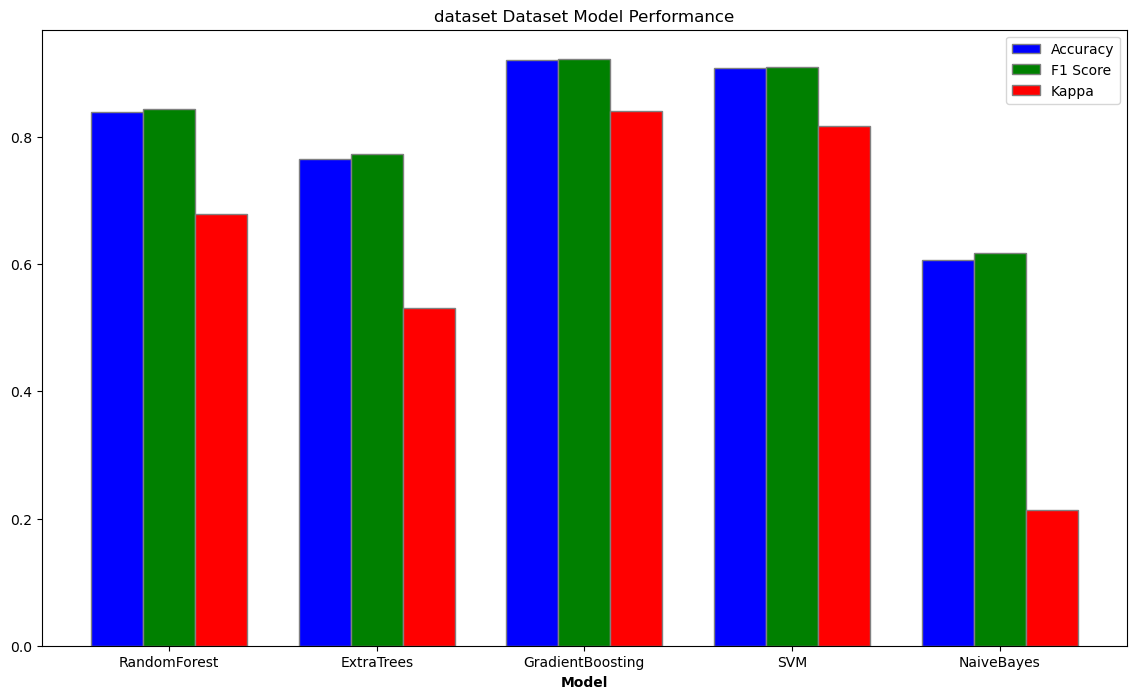

In [35]:
visualize_results(results)

In [36]:
for dataset_name, dataset_results in results.items():
    print(f"{dataset_name} Dataset Model Evaluation Results:")
    for model_name, metrics in dataset_results.items():
        print(f"\n{model_name.upper()} Model:")
        for metric, value in metrics.items():
            if metric == 'confusion_matrix':
                for i, cm in enumerate(value):
                    print(f"{metric.replace('_', ' ').title()} for target {i}:\n{cm}")
            elif metric == 'model':
                continue
            elif isinstance(value, dict):  # Handle nested dictionary (label_metrics)
                print(f"{metric.replace('_', ' ').title()}:")
                for label, label_metrics in value.items():
                    print(f"  {label}:")
                    for sub_metric, sub_value in label_metrics.items():
                        if sub_metric == 'confusion_matrix':
                            print(f"    {sub_metric.replace('_', ' ').title()}:\n{str(sub_value)}")
                        else:
                            print(f"    {sub_metric.replace('_', ' ').title()}: {sub_value:.4f}")
            else:
                print(f"{metric.replace('_', ' ').title()}: {value:.4f}")


dataset Dataset Model Evaluation Results:

RANDOMFOREST Model:
Accuracy: 0.8394
Average F1: 0.8440
Average Precision: 0.8359
Average Recall: 0.8542
Average Kappa: 0.6781
Label Metrics:
  DBA_PnL:
    Precision: 0.8745
    Recall: 0.8251
    F1: 0.8491
    Kappa: 0.7110
    Confusion Matrix:
[[517  67]
 [ 99 467]]
  GLD_PnL:
    Precision: 0.8246
    Recall: 0.8425
    F1: 0.8335
    Kappa: 0.6496
    Confusion Matrix:
[[446 107]
 [ 94 503]]
  USO_PnL:
    Precision: 0.8086
    Recall: 0.8949
    F1: 0.8496
    Kappa: 0.6736
    Confusion Matrix:
[[435 125]
 [ 62 528]]

EXTRATREES Model:
Accuracy: 0.7658
Average F1: 0.7726
Average Precision: 0.7641
Average Recall: 0.7823
Average Kappa: 0.5305
Label Metrics:
  DBA_PnL:
    Precision: 0.7926
    Recall: 0.7562
    F1: 0.7740
    Kappa: 0.5648
    Confusion Matrix:
[[472 112]
 [138 428]]
  GLD_PnL:
    Precision: 0.7484
    Recall: 0.7822
    F1: 0.7649
    Kappa: 0.4992
    Confusion Matrix:
[[396 157]
 [130 467]]
  USO_PnL:
    Precision

> PCA is not good for our model training.
>
> We will not use it.

In [37]:
def get_best_models(results):
    models = {}
    for dataset, model_info in results.items():
        models[dataset] = {model_name: metrics['model'] for model_name, metrics in model_info.items()}
    return models

pprint(get_best_models(results))

{'dataset': {'ExtraTrees': MultiOutputClassifier(estimator=ExtraTreesClassifier(max_depth=15,
                                                     min_samples_split=10,
                                                     n_estimators=150)),
             'GradientBoosting': MultiOutputClassifier(estimator=GradientBoostingClassifier(learning_rate=1.0,
                                                           max_depth=6,
                                                           min_samples_split=5,
                                                           n_estimators=200)),
             'NaiveBayes': MultiOutputClassifier(estimator=GaussianNB(var_smoothing=2.888176653914472e-10)),
             'RandomForest': MultiOutputClassifier(estimator=RandomForestClassifier(max_depth=15,
                                                       min_samples_split=10,
                                                       n_estimators=200)),
             'SVM': MultiOutputClassifier(estimator=SVC(C

### MIC

In [38]:
from sklearn.feature_selection import mutual_info_classif

from sklearn.feature_selection import mutual_info_classif
import pandas as pd

def calculate_MIC_scores(X, y):
    """
    Calculate Mutual Information Criterion (MIC) scores for features for each target variable.

    Parameters:
    X (DataFrame): The input feature set.
    y (DataFrame): The target variable with multiple columns.

    Returns:
    DataFrame: A DataFrame containing the MIC scores for each feature and each target variable.
    """
    mic_scores_df = pd.DataFrame()

    for column in y.columns:
        mic_scores = mutual_info_classif(X, y[column], discrete_features='auto')
        mic_scores_df[column] = pd.Series(mic_scores, index=X.columns)

    print("Mutual Information Scores:")
    print(mic_scores_df)
    print("\n")
    
    return mic_scores_df


def filter_features_by_threshold(X, mic_scores_df, threshold=0.001):
    """
    Filter features based on Mutual Information Criterion (MIC) scores and a threshold.

    Parameters:
    X (DataFrame): The input feature set.
    mic_scores_df (DataFrame): The DataFrame containing MIC scores for each feature and each target variable.
    threshold (float): The threshold for selecting features based on MIC scores. Default is 0.001.

    Returns:
    DataFrame: A DataFrame containing the selected features with MIC scores greater than the threshold for any target variable.
    """
    selected_features = mic_scores_df.max(axis=1)[mic_scores_df.max(axis=1) > threshold].index

    print(f"Selected Features ({len(selected_features)}):")
    print(selected_features)
    
    return X[selected_features]


MIC_scores_df = calculate_MIC_scores(X, y)
print("\n X_MIC \n")

X_MIC = filter_features_by_threshold(X, MIC_scores_df, threshold=0.001)

Mutual Information Scores:
                         DBA_PnL   GLD_PnL   USO_PnL
ind_prod_goods          0.000000  0.000000  0.003047
bill_rates              0.005200  0.000511  0.000000
equity_mkt_vol          0.000000  0.000000  0.000000
unemployment            0.009191  0.000000  0.006601
equity_mkt_uncertainty  0.000000  0.000000  0.000000
...                          ...       ...       ...
^VIX                    0.000000  0.007709  0.000000
^OVX                    0.000000  0.006623  0.000000
^VXN                    0.008912  0.003795  0.000000
EPU                     0.000000  0.000000  0.007590
ADX.AX                  0.000000  0.000000  0.013140

[80 rows x 3 columns]



 X_MIC 

Selected Features (70):
Index(['ind_prod_goods', 'bill_rates', 'unemployment',
       'equity_policy_uncertainty', 'DBA_SMA_50', 'DBA_EMA_30',
       'DBA_MACD_SIGNAL', 'DBA_RSI_10', 'DBA_RSI_30', 'DBA_RSI_200',
       'DBA_STOCH_10_k', 'DBA_STOCH_10_d', 'DBA_STOCH_30_k', 'DBA_STOCH_30_d',
       'DBA

<Figure size 1400x2000 with 0 Axes>

<Axes: xlabel='MIC', ylabel='Feature'>

Text(0.5, 1.0, 'Mutual Information Scores for Features (Log Scale)')

Text(0.5, 0, 'Mutual Information Score')

Text(0, 0.5, 'Feature')

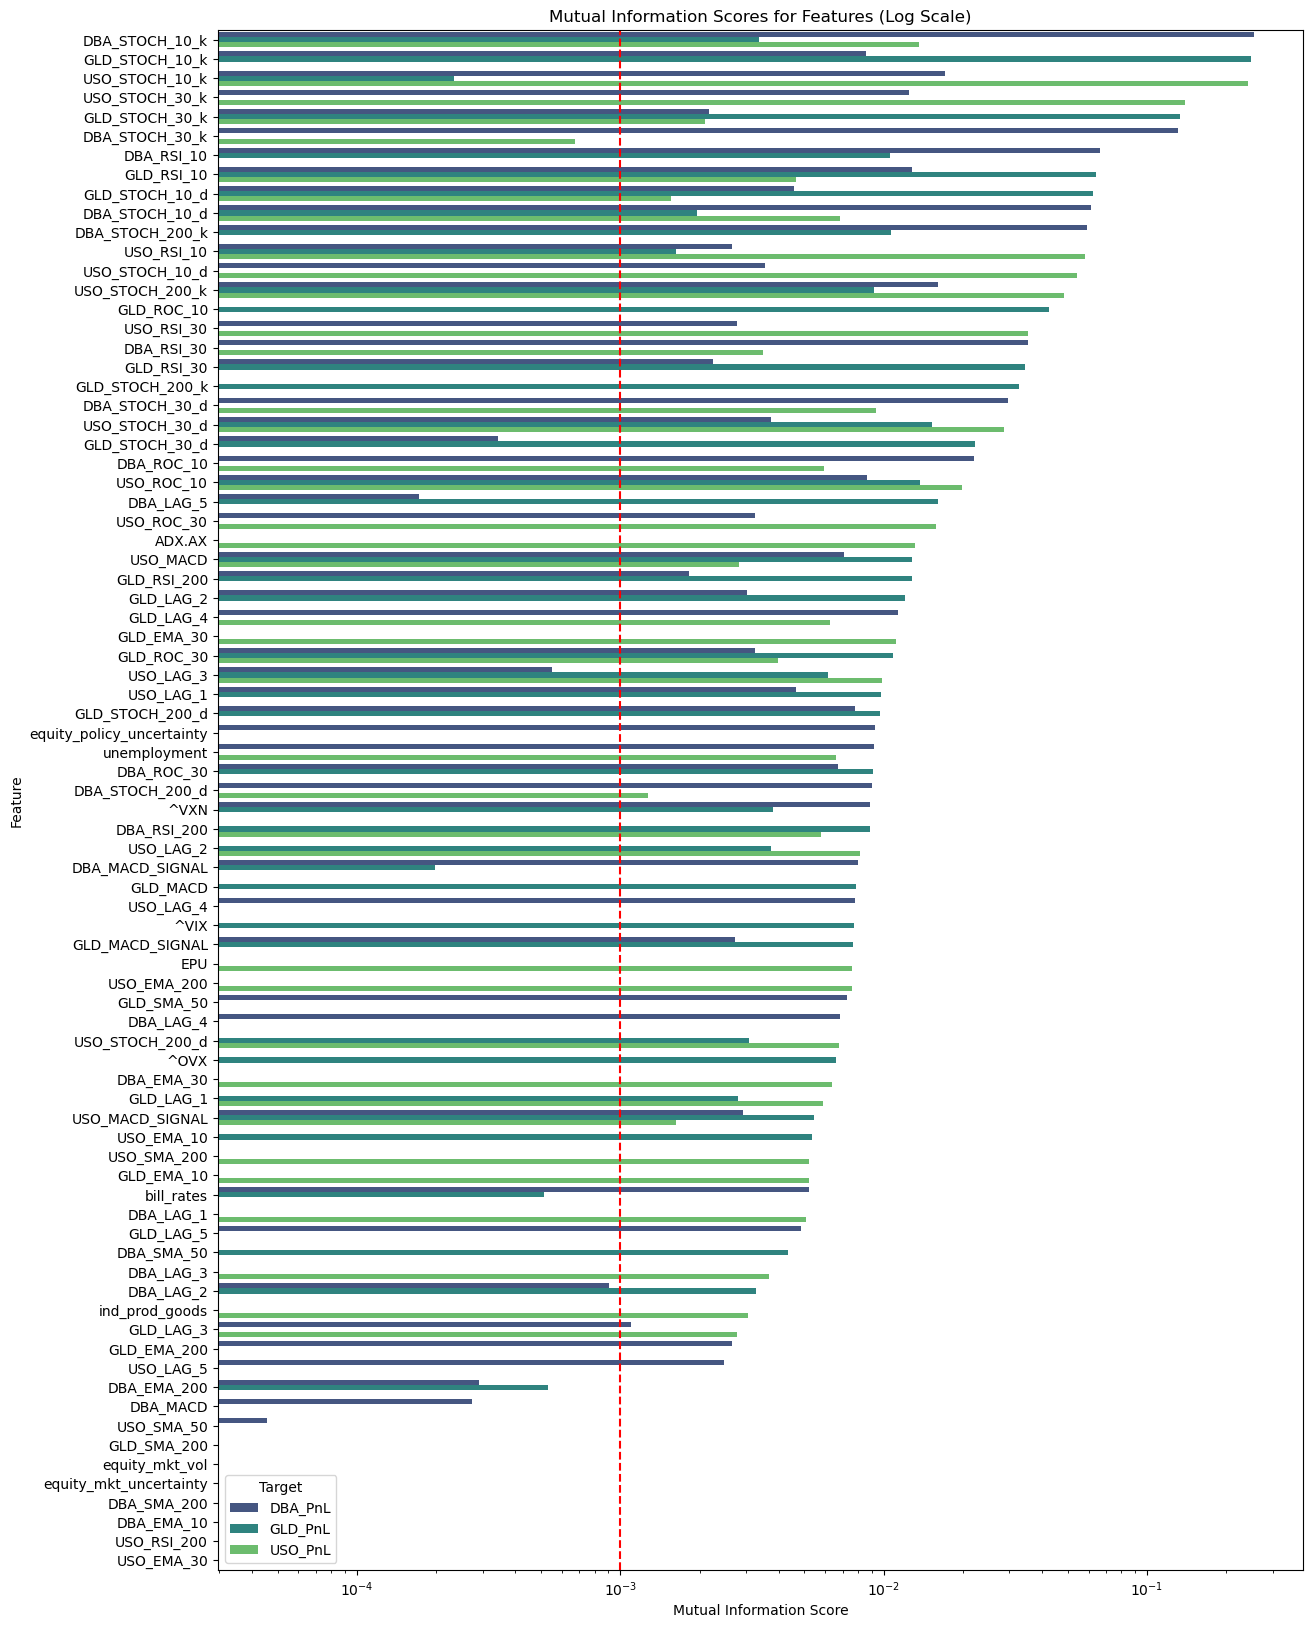

In [39]:
mic_scores_flatten = MIC_scores_df.unstack().reset_index()
mic_scores_flatten.columns = ['Target', 'Feature', 'MIC']
mic_df = mic_scores_flatten.sort_values(by='MIC', ascending=False)

# 绘制图表
plt.figure(figsize=(14, 20))
sns.barplot(x='MIC', y='Feature', hue='Target', data=mic_df, palette='viridis')
plt.axvline(x=0.001, color='r', linestyle='--')  # Assuming the threshold is 0.001
plt.title('Mutual Information Scores for Features (Log Scale)')
plt.xlabel('Mutual Information Score')
plt.ylabel('Feature')
plt.xscale('log')
plt.show()

In [40]:
# split dataset
X_MIC_train, X_MIC_val, X_MIC_test, y_train, y_val, y_test = split_data(X_MIC, y)

print("Data base set shape:", X_MIC_train.shape, y_train.shape)
print("Data validation set shape:", X_MIC_val.shape, y_val.shape)
print("Data test set shape:", X_MIC_test.shape, y_test.shape)

Data base set shape: (1725, 70) (1725, 3)
Data validation set shape: (1150, 70) (1150, 3)
Data test set shape: (719, 70) (719, 3)


In [41]:
# results_MIC = {"dataset_MIC": {}}

# print(f"Processing dataset_MIC...\n")

# for model_name, (model, param_dist) in model_params.items():
#     print(f"\t Optimizing {model_name} for dataset...\n")

#     best_model_MIC = optimize_model(model, param_dist, X_MIC_train, y_train)

#     evaluation_results_MIC = evaluate_model(best_model_MIC, X_MIC_val, y_val)
#     results_MIC["dataset_MIC"][model_name] = evaluation_results_MIC

In [ ]:
# Training and optimizing models
results_MIC = {"dataset_MIC": {}}

print(f"Processing dataset_MIC...\n")

for model_name, (model, param_dist) in model_params.items():
    print(f"\t Optimizing {model_name} for dataset...\n")
    
    best_model_MIC = optimize_model(model, param_dist, X_MIC_train, y_train)
    results_MIC["dataset_MIC"][model_name] = {'model': best_model_MIC}

print("Model training and optimization complete.")

Processing dataset_MIC...

	 Optimizing RandomForest for dataset...

	 Optimizing ExtraTrees for dataset...

	 Optimizing GradientBoosting for dataset...

	 Optimizing SVM for dataset...



In [ ]:
# Evaluating models
for model_name in results_MIC["dataset_MIC"]:
    print(f"\t Evaluating {model_name} for dataset_MIC...\n")
    
    best_model_MIC = results_MIC["dataset_MIC"][model_name]['model']
    evaluation_results_MIC = evaluate_model(best_model_MIC, X_MIC_val, y_val)
    results_MIC["dataset_MIC"][model_name].update(evaluation_results_MIC)

print("Model evaluation complete.")

In [ ]:
visualize_results(results_MIC)

In [ ]:
for dataset_name, dataset_results in results_MIC.items():
    print(f"{dataset_name} Dataset Model Evaluation Results:")
    for model_name, metrics in dataset_results.items():
        print(f"\n{model_name.upper()} Model:")
        for metric, value in metrics.items():
            if metric == 'confusion_matrix':
                for i, cm in enumerate(value):
                    print(f"{metric.replace('_', ' ').title()} for target {i}:\n{cm}")
            elif metric == 'model':
                continue
            elif isinstance(value, dict):  # Handle nested dictionary (label_metrics)
                print(f"{metric.replace('_', ' ').title()}:")
                for label, label_metrics in value.items():
                    print(f"  {label}:")
                    for sub_metric, sub_value in label_metrics.items():
                        if sub_metric == 'confusion_matrix':
                            print(f"    {sub_metric.replace('_', ' ').title()}:\n{str(sub_value)}")
                        else:
                            print(f"    {sub_metric.replace('_', ' ').title()}: {sub_value:.4f}")
            else:
                print(f"{metric.replace('_', ' ').title()}: {value:.4f}")


In [ ]:
pprint(get_best_models(results_MIC))

In [ ]:
def visualize_comparison_results(results1, results2, label1, label2):
    """
    Visualize the performance metrics of two datasets for comparison.

    Parameters:
    results1 (dict): A dictionary containing evaluation results for each model on the first dataset.
    results2 (dict): A dictionary containing evaluation results for each model on the second dataset.
    label1 (str): Label for the first dataset.
    label2 (str): Label for the second dataset.
    """
    accuracies1 = [metrics['accuracy'] for model, metrics in results1['dataset'].items()]
    f1_scores1 = [metrics['average_f1'] for model, metrics in results1['dataset'].items()]
    kappas1 = [metrics['average_kappa'] for model, metrics in results1['dataset'].items()]
    
    accuracies2 = [metrics['accuracy'] for model, metrics in results2['dataset_MIC'].items()]
    f1_scores2 = [metrics['average_f1'] for model, metrics in results2['dataset_MIC'].items()]
    kappas2 = [metrics['average_kappa'] for model, metrics in results2['dataset_MIC'].items()]

    bar_width = 0.35
    r1 = np.arange(len(results1['dataset']))
    r2 = [x + bar_width for x in r1]

    plt.figure(figsize=(14, 8))

    # Accuracy comparison
    plt.bar(r1, accuracies1, color='b', width=bar_width, edgecolor='grey', label=f'Accuracy ({label1})')
    plt.bar(r2, accuracies2, color='c', width=bar_width, edgecolor='grey', label=f'Accuracy ({label2})')
    plt.ylabel('Accuracy')
    plt.xlabel('Model')
    plt.xticks([r + bar_width/2 for r in range(len(results1['dataset']))], results1['dataset'].keys())
    plt.legend()
    plt.title('Comparison of Accuracy between Datasets')
    plt.show()

    plt.figure(figsize=(14, 8))

    # F1 Score comparison
    plt.bar(r1, f1_scores1, color='g', width=bar_width, edgecolor='grey', label=f'F1 Score ({label1})')
    plt.bar(r2, f1_scores2, color='lightgreen', width=bar_width, edgecolor='grey', label=f'F1 Score ({label2})')
    plt.ylabel('F1 Score')
    plt.xlabel('Model')
    plt.xticks([r + bar_width/2 for r in range(len(results1['dataset']))], results1['dataset'].keys())
    plt.legend()
    plt.title('Comparison of F1 Score between Datasets')
    plt.show()

    plt.figure(figsize=(14, 8))

    # Kappa comparison
    plt.bar(r1, kappas1, color='r', width=bar_width, edgecolor='grey', label=f'Kappa ({label1})')
    plt.bar(r2, kappas2, color='pink', width=bar_width, edgecolor='grey', label=f'Kappa ({label2})')
    plt.ylabel('Kappa')
    plt.xlabel('Model')
    plt.xticks([r + bar_width/2 for r in range(len(results1['dataset']))], results1['dataset'].keys())
    plt.legend()
    plt.title('Comparison of Kappa between Datasets')
    plt.show()

    
visualize_comparison_results(results, results_MIC, 'Original Data', 'MIC Data')


## Meta Model

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted

class MultiOutputAdaBoostClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, base_estimator=None, n_estimators=50, learning_rate=1.0, random_state=None):
        self.base_estimator = base_estimator
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.random_state = random_state
    
    def fit(self, X, y):
        X, y = check_X_y(X, y, multi_output=True)
        self.models_ = []
        self.classes_ = []
        for i in range(y.shape[1]):
            model = AdaBoostClassifier(
                base_estimator=self.base_estimator,
                n_estimators=self.n_estimators,
                learning_rate=self.learning_rate,
                random_state=self.random_state
            )
            model.fit(X, y[:, i])
            self.models_.append(model)
            self.classes_.append(model.classes_)
        return self
    
    def predict(self, X):
        check_is_fitted(self, 'models_')
        X = check_array(X)
        predictions = np.column_stack([model.predict(X) for model in self.models_])
        return predictions
    
    def predict_proba(self, X):
        check_is_fitted(self, 'models_')
        X = check_array(X)
        probas = [model.predict_proba(X) for model in self.models_]
        return probas

# Use the modified class for your training and evaluation


def extract_best_models(results, dataset_key='dataset'):
    """
    Extract the best trained base models from results.

    Parameters:
    results (dict): A dictionary containing the trained base models.
    dataset_key (str): The key in the results dictionary that contains the dataset information.

    Returns:
    dict: A dictionary of the best trained base models.
    """
    return {model_name: result['model'] for model_name, result in results[dataset_key].items()}


def generate_meta_features(trained_models, X):
    """
    Generate meta features using trained base models.

    Parameters:
    trained_models (dict): A dictionary of trained base models.
    X (DataFrame): The feature set to generate meta features from.

    Returns:
    np.array: An array of meta features.
    """
    meta_features = []
    for model_name, model in trained_models.items():
        y_pred_proba = model.predict_proba(X)
        flattened_predictions = np.column_stack([pred[:, 1] for pred in y_pred_proba])
        meta_features.append(flattened_predictions)
    return np.hstack(meta_features)

def train_meta_model(X_meta_train, y_train, search_spaces, random_state=42):
    """
    Train the meta model using meta features.

    Parameters:
    X_meta_train (np.array): The meta features for training.
    y_train (np.array): The target variable for training.
    search_spaces (dict): The hyperparameter search space for the meta model.
    random_state (int): Random seed for reproducibility. Default is 42.

    Returns:
    estimator: The best meta-model found by hyperparameter search.
    """
    meta_model = MultiOutputAdaBoostClassifier(random_state=random_state)
    opt = BayesSearchCV(meta_model, search_spaces, n_iter=30, cv=3, n_jobs=-1, random_state=random_state, scoring='accuracy')
    
    with parallel_backend('threading'):
        opt.fit(X_meta_train, y_train)
    
    return opt.best_estimator_

def evaluate_model_performance(model, X, y):
    """
    Evaluate the performance of the given model.

    Parameters:
    model (estimator): The model to be evaluated.
    X (DataFrame): The feature set for evaluation.
    y (DataFrame): The true labels.

    Returns:
    dict: A dictionary of evaluation metrics.
    """
    y_pred = model.predict(X)
    
    label_metrics = {}
    for i, col in enumerate(y.columns):
        label_metrics[col] = {
            'precision': precision_score(y.iloc[:, i], y_pred[:, i], zero_division=0),
            'recall': recall_score(y.iloc[:, i], y_pred[:, i], zero_division=0),
            'f1': f1_score(y.iloc[:, i], y_pred[:, i], zero_division=0),
            'kappa': cohen_kappa_score(y.iloc[:, i], y_pred[:, i]),
            'confusion_matrix': confusion_matrix(y.iloc[:, i], y_pred[:, i])
        }

    avg_precision = np.mean([metrics['precision'] for metrics in label_metrics.values()])
    avg_recall = np.mean([metrics['recall'] for metrics in label_metrics.values()])
    avg_f1 = np.mean([metrics['f1'] for metrics in label_metrics.values()])
    avg_kappa = np.mean([metrics['kappa'] for metrics in label_metrics.values()])
    avg_accuracy = np.mean([accuracy_score(y.iloc[:, i], y_pred[:, i]) for i in range(y.shape[1])])
    
    return {
        'accuracy': avg_accuracy,
        'average_f1': avg_f1,
        'average_precision': avg_precision,
        'average_recall': avg_recall,
        'average_kappa': avg_kappa,
        'label_metrics': label_metrics
    }


def print_stacking_model_performance(stacking_results):
    """
    Print the performance metrics of the stacking model.

    Parameters:
    stacking_results (dict): A dictionary containing the evaluation metrics of the stacking model.
    """
    print("Stacking Model Performance:\n")
    for metric, value in stacking_results.items():
        if metric == 'label_metrics':
            for label, metrics in value.items():
                print(f"Performance Metrics for {label}:\n")
                for m, v in metrics.items():
                    if m == 'confusion_matrix':
                        print(f"  {m.replace('_', ' ').title()}:\n{v}\n")
                    else:
                        print(f"  {m.replace('_', ' ').title()}: {v:.4f}")
                print()  # Add an extra newline for better separation
        else:
            if metric == 'meta_model':
                print(f"{metric.replace('_', ' ').title()}: {value}\n")
            else:
                print(f"{metric.replace('_', ' ').title()}: {value:.4f}")
            print()  # Add an extra newline for better separation

In [ ]:
# Define hyperparameter search space for the meta model
search_spaces = {
    'n_estimators': Integer(50, 200),
    'learning_rate': Real(0.01, 1.0, prior='log-uniform')
}

# Extract best base models from results
trained_base_models = extract_best_models(results)

# Generate meta features for training
X_meta_train = generate_meta_features(trained_base_models, X_val)

# Train the meta model

print(f"Processing dataset...\n")

best_meta_model = train_meta_model(X_meta_train, y_val, search_spaces)

print()
print("Stacking Model training and optimization complete.")

In [ ]:
# Generate meta features for testing
X_meta_test = generate_meta_features(trained_base_models, X_test)

# Evaluate the performance of the meta model
stacking_results = evaluate_model_performance(best_meta_model, X_meta_test, y_test)
stacking_results['meta_model'] = best_meta_model

# Use the function to print the stacking model performance
print_stacking_model_performance(stacking_results)

### Stacking model for MIC dataset

In [ ]:
trained_base_models_MIC = extract_best_models(results_MIC, dataset_key='dataset_MIC')

# Generate meta features for training
X_meta_MIC_train = generate_meta_features(trained_base_models_MIC, X_MIC_val)

# Train the meta model
print(f"Processing dataset...\n")

best_meta_model_MIC = train_meta_model(X_meta_MIC_train, y_val, search_spaces)

print()
print("Stacking Model for MIC dataset training and optimization complete.")

In [ ]:
# Generate meta features for testing
X_meta_MIC_test = generate_meta_features(trained_base_models_MIC, X_MIC_test)

# Evaluate the performance of the meta model
stacking_results_MIC = evaluate_model_performance(best_meta_model_MIC, X_meta_MIC_test, y_test)
stacking_results_MIC['meta_model'] = best_meta_model_MIC

# Use the function to print the stacking model performance
print_stacking_model_performance(stacking_results_MIC)

In [ ]:
# # predict for new data
# X_new = np.random.rand(10, X_dba_base.shape[1])  # 假设X_new是新的数据
# y_pred_dba = predict_with_stacking_model(trained_base_models_dba, best_meta_model_dba, X_new)
# y_pred_gld = predict_with_stacking_model(trained_base_models_gld, best_meta_model_gld, X_new)
# y_pred_uso = predict_with_stacking_model(trained_base_models_uso, best_meta_model_uso, X_new)
# 
# print("Predictions for new data (DBA):", y_pred_dba)
# print("Predictions for new data (GLD):", y_pred_gld)
# print("Predictions for new data (USO):", y_pred_uso)

## Plotting

In [ ]:
print(datasets)

In [ ]:
results

In [ ]:
results_MIC

In [ ]:
print(results.keys())
print(results_MIC.keys())

In [ ]:
def extract_base_metrics(results, dataset_key, metrics):
    base_model_names = list(results[dataset_key].keys())
    base_metrics = {metric: [results[dataset_key][model][metric] for model in base_model_names] for metric in metrics}
    return base_metrics, base_model_names

def extract_stacking_metrics_for_dataset(stacking_results, dataset_name):
    dataset_results = {
        'accuracy': stacking_results['label_metrics'][dataset_name]['f1'],
        'average_f1': stacking_results['label_metrics'][dataset_name]['f1'],
        'average_kappa': stacking_results['label_metrics'][dataset_name]['kappa']
    }
    return dataset_results

def plot_metrics(ax, base_model_names, base_metrics_original, stack_metrics_original, base_metrics_MIC, stack_metrics_MIC, metric_name):
    ax.plot(base_model_names, base_metrics_original[metric_name], label='Base Models (Original)', marker='o')
    ax.plot(base_model_names, base_metrics_MIC[metric_name], label='Base Models (MIC)', marker='x')
    ax.axhline(y=stack_metrics_original[metric_name], color='r', linestyle='-', label='Stacking Model (Original)')
    ax.axhline(y=stack_metrics_MIC[metric_name], color='b', linestyle='-', label='Stacking Model (MIC)')
    ax.set_title(f'{metric_name.capitalize()} Score')
    ax.set_xlabel('Model')
    ax.set_ylabel('Score')
    ax.legend()

def visualize_results_for_dataset(results_original, results_MIC, stacking_results_original, stacking_results_MIC, dataset_name):
    metrics = ['accuracy', 'average_f1', 'average_kappa']
    base_metrics_original, base_model_names = extract_base_metrics(results_original, 'dataset', metrics)
    base_metrics_MIC, _ = extract_base_metrics(results_MIC, 'dataset_MIC', metrics)
    stack_metrics_original = extract_stacking_metrics_for_dataset(stacking_results_original, dataset_name)
    stack_metrics_MIC = extract_stacking_metrics_for_dataset(stacking_results_MIC, dataset_name)
    
    fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
    
    for i, metric in enumerate(metrics):
        plot_metrics(axs[i], base_model_names, base_metrics_original, stack_metrics_original, base_metrics_MIC, stack_metrics_MIC, metric)
    
    fig.suptitle(f'{dataset_name} Dataset Performance Comparison')
    plt.show()

In [ ]:
# Visualize results for each dataset
visualize_results_for_dataset(
    results,
    results_MIC,
    stacking_results,
    stacking_results_MIC,
    'DBA_PnL'
)

visualize_results_for_dataset(
    results,
    results_MIC,
    stacking_results,
    stacking_results_MIC,
    'GLD_PnL'
)

visualize_results_for_dataset(
    results,
    results_MIC,
    stacking_results,
    stacking_results_MIC,
    'USO_PnL'
)

# Build Portfolio

### Funtion to Predict

In [ ]:
def predict_with_stacking_model(base_models, meta_model, X_new):
    """
    Predict using the stacking model on new data.

    Parameters:
    base_models (dict): A dictionary of trained base models.
    meta_model (estimator): The trained meta-model.
    X_new (DataFrame): The new feature set to predict.

    Returns:
    np.array: An array of predictions.
    """
    # Generate meta features for new data
    X_meta_new = generate_meta_features(base_models, X_new)
    
    # Predict with meta model
    y_new_pred = meta_model.predict(X_meta_new)
    
    return y_new_pred

In [ ]:
# y_new_predictions = predict_with_stacking_model(trained_base_models_MIC, best_meta_model_MIC, X_new)

# # Print or use the new predictions
# print(y_new_predictions)

### Portfolio

In [ ]:
df = pd.DataFrame({
    'DBA': y_test[DBA_PnL],
    'GLD': y_test[GLD_PnL],
    'OIL': y_test[USO_PnL]
})

print(df)

# df.to_csv('MyDataFrame.csv', index=False)

In [ ]:
len(y_dba_pred)

In [ ]:
y_dba_pred[0]

In [ ]:
dba_with_indicators#["returns"]

In [ ]:
def return_obtain(y_dba_test,y_dba_pred,dba_with_indicators):
    list_return =[]
    for i in range(len(y_dba_pred)):
        indexs = y_dba_test.index[i]  # 获取正确的索引
        if y_dba_pred[i] == y_dba_test.iloc[i]:  # 使用 .iloc 确保按位置访问
            list_return.append(abs(dba_with_indicators.loc[indexs, "returns"]))
        elif y_dba_pred[i] != y_dba_test.iloc[i]:
            list_return.append(-abs(dba_with_indicators.loc[indexs, "returns"]))
    return list_return

In [ ]:
list_return_dba = return_obtain(y_dba_test,y_dba_pred,dba_with_indicators)
list_return_gld = return_obtain(y_gld_test,y_gld_pred,gld_with_indicators)
list_return_uso = return_obtain(y_uso_test,y_uso_pred,uso_with_indicators)

In [ ]:
df_return = pd.DataFrame({
    'DBA': list_return_dba,
    'GLD': list_return_gld,
    'USO': list_return_uso
})

df_return

In [ ]:
def portfolio_objective(weights, returns, cov_matrix):
    portfolio_return = np.dot(returns, weights)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return -portfolio_return / portfolio_volatility  # Minimize negative Sharpe ratio

# Define the PSO algorithm for portfolio optimization
def pso_portfolio(returns, cov_matrix, num_assets, num_particles=30, max_iter=100, w=0.5, c1=1, c2=2):
    # Initialize particles and velocities representing portfolio weights
    particles = np.random.rand(num_particles, num_assets)
    particles /= particles.sum(axis=1, keepdims=True)  # Normalize to ensure weights sum to 1
    velocities = np.zeros_like(particles)

    # Initialize the best positions and fitness values
    best_positions = np.copy(particles)
    best_fitness = np.array([portfolio_objective(p, returns, cov_matrix) for p in particles])
    swarm_best_position = best_positions[np.argmin(best_fitness)]
    swarm_best_fitness = np.min(best_fitness)

    # Iterate through the specified number of iterations, updating the velocity and position of each particle at each iteration
    for i in range(max_iter):
        # Update velocities
        r1 = np.random.uniform(0, 1, (num_particles, num_assets))
        r2 = np.random.uniform(0, 1, (num_particles, num_assets))
        velocities = w * velocities + c1 * r1 * (best_positions - particles) + c2 * r2 * (swarm_best_position - particles)

        # Update positions and normalize weights
        particles += velocities
        particles /= particles.sum(axis=1, keepdims=True)

        # Evaluate fitness of each particle
        fitness_values = np.array([portfolio_objective(p, returns, cov_matrix) for p in particles])

        # Update best positions and fitness values
        improved_indices = np.where(fitness_values < best_fitness)
        best_positions[improved_indices] = particles[improved_indices]
        best_fitness[improved_indices] = fitness_values[improved_indices]
        if np.min(fitness_values) < swarm_best_fitness:
            swarm_best_position = particles[np.argmin(fitness_values)]
            swarm_best_fitness = np.min(fitness_values)

    # Return the best solution found by the PSO algorithm
    return swarm_best_position, -swarm_best_fitness  # Return the positive Sharpe ratio


num_assets = df_return.shape[1]

# Drop NaN values in the returns
#daily_returns = daily_returns.dropna()
daily_returns = df_return 


# Calculate covariance matrix
cov_matrix = np.cov(daily_returns, rowvar=False)


returns = daily_returns.mean().to_numpy()

# Print the results
print("Returns:")
print(daily_returns)
print(returns)
print("\nCovariance Matrix:")
print(cov_matrix)



# Run the PSO algorithm on the portfolio optimization problem
solution, fitness = pso_portfolio(returns, cov_matrix, num_assets)


# Print the solution (portfolio weights) and fitness value (Sharpe ratio)
print('Portfolio Weights:', solution)
print('Sharpe Ratio:', fitness)

# Visualization (2D for simplicity)
fig, ax = plt.subplots()
ax.bar(range(num_assets), solution)
asset_labels = ['DBA', 'Gold',"USO"]
ax.set_xticks(range(len(asset_labels)))
ax.set_xticklabels(asset_labels)
ax.set_ylabel('Portfolio Weight')
ax.set_title('Optimal Portfolio Weights')
plt.show()

#### 